In [1]:
import numpy as np
import pandas as pd
import spacy

In [2]:
train_data = pd.read_csv("../../data/open/train.csv")
train_data

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [8]:
nlp = spacy.load("en_core_web_sm")

first_partys = train_data.first_party

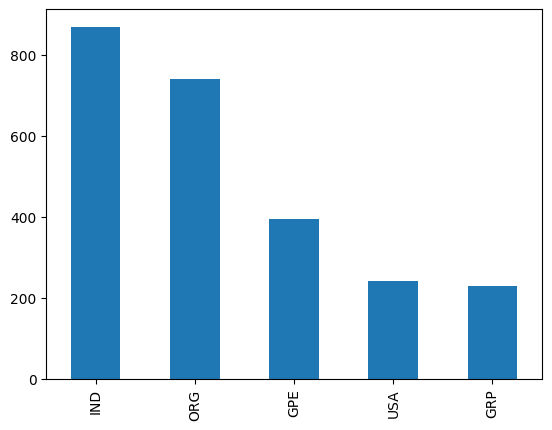

In [51]:
pd.Series(grps).value_counts().plot.bar();

In [50]:
grps = []
for party in first_partys:
    keywords_usa = ['united states', 'federal', 'commision', 'commodity', 'national']
    keywords_gpe = ['school board', 'city', 'republic', 'region', 'district', 'county']
    keywords_org = ['corporation', 'inc', 'company', 'bank', 'association', 'llc', 'ltd', 'llp', 'co.', 'hospital', 'usa', 'school', 'group', 'office', 'department']
    keywords_grp = [',', 'et al']
    party_lower = party.lower()
    
    for keyword in keywords_usa:
        if keyword in party_lower:
            grp = 'USA'
            break
    else:
        ents = nlp(party).ents
        labels = [e.label_ for e in ents]
        if ('GPE' in labels) or len(list(filter(lambda k: k in party_lower, keywords_gpe))):
            grp = 'GPE'
        elif ('ORG' in labels) or ('NORP' in labels) or [keyword for keyword in keywords_org if keyword in party_lower]:
            grp = 'ORG'
        elif (len(labels) > 1) or (',' in party) or ('et al' in party):
            grp = 'GRP'
        else:
            grp = 'IND'
    grps.append(grp)
#     if grp == 'IND':
    print(grp, '\t', party)

IND 	 Phil A. St. Amant
IND 	 Stephen Duncan
IND 	 Billy Joe Magwood
IND 	 Linkletter
IND 	 William Earl Fikes
ORG 	 C & A Carbone, Inc., et al.
GRP 	 David Jennings, et al.
ORG 	 US Airways, Inc.
GRP 	 Ron Davis, Acting Warden
IND 	 Paul A. McDaniel
GPE 	 Falls City Industries, Inc.
GRP 	 Allen et al.
GPE 	 First Unitarian Church for Los Angeles
GRP 	 James Obergefell, et al.
GRP 	 James J. Thole, et al.
GPE 	 Pierce County
IND 	 Plyler
IND 	 Steven Spears
USA 	 United States
GRP 	 Delbert Williamson, et al.
IND 	 Clay
IND 	 Bassam Yacoub Salman
GPE 	 Organized Village of Kake, Angoon Community Association
GPE 	 Edward Malley and Rhode Island
GPE 	 Charles Wilkie et al.
ORG 	 Tennessee Valley Authority
USA 	 United States
ORG 	 American Express, et al.
GRP 	 Winston M. Holloway, et al.
IND 	 Verlinden B. V.
ORG 	 United Haulers Association, Inc., et al.
USA 	 United States
IND 	 Eric L. Thompson
IND 	 Gerald T. Martin et ux.
GRP 	 Jeanne S. Woodford et al.
ORG 	 Caterpillar Inc.
IND 	

GPE 	 William V. Grady, District Attorney of Dutchess County
GRP 	 William Crawford et al.
ORG 	 Richlin Security Service Company
IND 	 Michael A. Watson
USA 	 United States
IND 	 Apodaca
IND 	 Vaughan
GPE 	 Randy White, Warden
GPE 	 Illinois
GPE 	 Inyo County, California
ORG 	 Wisconsin Central Ltd., et al.
IND 	 Timothy Scott
IND 	 Lopez
ORG 	 Mid-Con Freight Systems, Inc., et al.
ORG 	 Arthur Andersen LLP
IND 	 Bates
IND 	 Lester Ray Nichols
ORG 	 Atlantic Marine Construction Company
GPE 	 Rhode Island
ORG 	 Gitlitz
IND 	 Ronald Rompilla
USA 	 National Cable & Telecommunications Association, et al.
GPE 	 City of Philadelphia et al.
GPE 	 Cleveland
GRP 	 Shannon Nelson and Louis Alonzo Madden
ORG 	 First English Evangelical Lutheran Church of Glendale
IND 	 Neal
GPE 	 New York
ORG 	 Price Waterhouse
ORG 	 TC Heartland LLC 
USA 	 United States
IND 	 Fane Lozman
ORG 	 Goldman Sachs Group, Inc., et al.
IND 	 Carman L. Deck
GPE 	 Bolivarian Republic of Venezuela, et al.
ORG 	 Wilson
IND 

ORG 	 Board of Regents of State Colleges
ORG 	 Koon
ORG 	 Allied-Bruce Terminix Co.
GPE 	 John O. Graham, Commissioner, Department of Public Welfare, State of Arizona
GPE 	 Board of Airport Commissioners of the City of Los Angeles
USA 	 United States
GPE 	 Massachusetts
GRP 	 John Geddes Lawrence and Tyron Garner
ORG 	 T-Mobile South, LLC
ORG 	 Weyerhaeuser Company
IND 	 Mitchell
ORG 	 American Insurance Ass'n
ORG 	 J. Elliott Hibbs, Director, Arizona Department of Revenue
IND 	 Brown
IND 	 Norton Anthony Russell 
ORG 	 Integrity Staffing Solutions, Inc.
IND 	 Roell
ORG 	 Merck & Co., Inc., et al.
USA 	 United States
ORG 	 Corporation of the Presiding Bishop of the Church of Jesus Christ of Latter-Day Saints
IND 	 Houchins
ORG 	 Humana Inc.
ORG 	 Basic, Incorporated, et al.
IND 	 Furman
ORG 	 Lucky Brand Dungarees Inc., et al.
IND 	 Jeffrey Richard Robbins
GRP 	 Ian Calder, John South
ORG 	 M. B. Z., By His Parents and Guardians, Ari Z. Zivotofsky, et ux.
IND 	 Richard Erznoznik
IND 	 

ORG 	 Tellabs, Inc., et al.
IND 	 Lenard Ray Beecham
GRP 	 Ashley Sveen, et al.
ORG 	 The Travelers Indemnity Company, et al.
IND 	 Supap Kirtsaeng
IND 	 Clinton
GPE 	 Board of Education of the City School District of the City of New York
IND 	 Vernon Madison
ORG 	 Department of Housing and Urban Development
ORG 	 Impression Products, Inc.
GPE 	 David Bobby, Warden
IND 	 Richard Irizarry
IND 	 Bob Camreta
GPE 	 Harry F. Connick, District Attorney, et al.
GRP 	 Joseph Jesner, et al.
ORG 	 MeadWestvaco Corp., successor in interest to Mead Corp.
ORG 	 Hall Street Associates, L.L.C.
IND 	 Carmell
IND 	 Walters
ORG 	 Altitude Express, Inc., et al.
USA 	 Federal Express Corporation
ORG 	 Capital Cities Cable, Inc.
IND 	 Webster
ORG 	 General Motors Corporation
IND 	 David Riggins
IND 	 Block
GPE 	 Supreme Court of Virginia, et al.
USA 	 United States
ORG 	 Mississippi University for Women
GPE 	 Jeffrey Woods, Warden
IND 	 Roe
GPE 	 Georgia
IND 	 Sally Reed
IND 	 Bowen
IND 	 Lambert
ORG 	 Ted

GRP 	 Jefferson B. Sessions III, Attorney General
ORG 	 Digital Equipment Corporation
GPE 	 Washington
IND 	 Eisenstadt
IND 	 Commissioner
ORG 	 Florida Bar
ORG 	 Heller, Secretary, Kentucky Cabinet For Human Resources
USA 	 United States
ORG 	 Regents of the University of Michigan
GPE 	 James Ingraham, Roosevelt Andrews
ORG 	 E.C. Dothard, Director, Dept. of Public Safety of Alabama 
USA 	 United States
ORG 	 Northeast Bancorp, Inc.
IND 	 Anthony Elonis
IND 	 Anderson
GPE 	 Vernonia School District 47J
GPE 	 City of Monterey
IND 	 Bartnicki
ORG 	 Maryland State Comptroller of Treasury
IND 	 Martin
GPE 	 Michael Sexton, Warden
ORG 	 CBOCS West, Inc.
ORG 	 Franchise Tax Board of California
IND 	 John Ashcroft
IND 	 Foster
IND 	 Clarence E. Hill
ORG 	 eBay Inc. et al.
ORG 	 Atlantic Mutual Insurance Company
GPE 	 Texas Monthly, Inc.
GRP 	 Richard Armstrong, et al.
IND 	 Henry L. Hess Jr.
ORG 	 Baker Botts, LLP
IND 	 Charles Rowoldt
GPE 	 Board of Education, Island Trees Union Free School

GRP 	 Sally L. Conkright, et al.
IND 	 Miranda
USA 	 Federal Housing Administration
ORG 	 Harvey Leroy Sossamon, III
IND 	 Bowers
GRP 	 Alberto R. Gonzales, Attorney General
ORG 	 CRST Van Expedited Inc.
IND 	 Gregory Dean Banister
IND 	 Malloy
IND 	 Bruce Edward Brendlin
ORG 	 Turner Broadcasting System, Inc.
IND 	 James Lockhart
ORG 	 Steel Company
ORG 	 Ohio Adult Parole Authority
USA 	 United States
USA 	 Federal Maritime Commission
GRP 	 Clyde Reed, et al.
USA 	 Motor Vehicle Manufacturers Association of the United States, et al.
ORG 	 Southern Union Company
GPE 	 D. H. Overmyer Company, Inc., of Ohio
IND 	 Lockhart
ORG 	 Shaare Tefila Congregation
ORG 	 Simon & Schuster, Inc.
USA 	 United States
USA 	 United States
ORG 	 Texas Department of Community Affairs
IND 	 Stephen Law
ORG 	 TrafFix Devices Inc.
GRP 	 Rebecca Friedrichs, et al.
GPE 	 Rutan
ORG 	 Matrixx Initiatives, Inc.
IND 	 Saucier
USA 	 United States
IND 	 Rodriguez
GPE 	 Jule M. Sugarman, Administrator, New York City 

GRP 	 Mark Coppedge, Jr.
ORG 	 Central Hudson Gas & Electric Corporation
USA 	 National Credit Union Administration
IND 	 Nixon
ORG 	 PacifiCare Health Systems, Inc.
IND 	 Fane Lozman
IND 	 Michael N. Currier
GPE 	 Deborah K. Johnson, Warden
ORG 	 Reginald A. Wilkinson, Director, Ohio Department of Rehabilitation and Correction, et al.
IND 	 Crown Kosher Super Market
GRP 	 Leander H. Perez, Jr.; Louis Reichart; George Bethea; Earl Wendling 
GRP 	 Alberto R. Gonzales, Attorney General, et al.
IND 	 Lawrence
GRP 	 Jerry Gunn, et al.
IND 	 Cooper
ORG 	 John Moran, Superintendent of the Rhode Island Dept. of Corrections 
IND 	 Andre Lee Coleman
GPE 	 G. Steven Rowe, Attorney General of Maine
GPE 	 Board of Education of the Hendrick Hudson Central School District, Westchester County, The Commissioner of Education of the State of New York
GPE 	 Colorado
IND 	 Barnhart
IND 	 Oncale
GRP 	 Timothy D. Koons, Kenneth Jay Putensen, Randy Feauto, Esequiel Gutierrez, and Jose Manuel Gardea
ORG 	 Min

IND 	 Witherspoon
USA 	 United States
GPE 	 Puerto Rico
GRP 	 League of United Latin American Citizens et al.
ORG 	 Star Athletica, LLC
IND 	 Edward G. McDonough
IND 	 Edward Mishkin
ORG 	 Jeffrey Uttecht, Superintendent, Washington State Penitentiary
ORG 	 Stop the Beach Renourishment, Inc.
ORG 	 William B. Saxbe, United Farm Workers Organizing Committee
IND 	 Bousley
IND 	 Randy Braswell
GRP 	 Juan Bravo-Fernandez, et al.
USA 	 Colorado Republican Federal Campaign Committee
USA 	 United States
ORG 	 Washington State Department of Licensing
GPE 	 Arizona
IND 	 Salinas
ORG 	 Exxon Corporation et al.
ORG 	 NCAA
GPE 	 Town of Chester, New York
ORG 	 44 Liquormart Inc.
GPE 	 Michigan
ORG 	 Bank of America Corporation, et al.
IND 	 Hamid Mohamed Rehaif
IND 	 Bryan
ORG 	 Supreme Court of Virginia
IND 	 Basim Omar Sabri
ORG 	 Law Students Civil Rights Research Council, Inc., et al.
IND 	 M. L. B.
GPE 	 Ricky Bell, Warden
IND 	 Rocky Dietz
ORG 	 Burlington Northern and Santa Fe Railway Compan